In [26]:
from utils.analyze import load_data
from utils.analysis import detrend2D, wiener, sensor_function
from utils.plot import plot
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
x, y, z, T, t, settings = load_data("height01", range(1,21))
x = x[0]
y = y[0]
settings = settings[0]

In [3]:
def cat1d(x):
    x_flat = [xi.flatten() for xi in x]
    return np.concatenate(x_flat)

In [4]:
dt = np.array([[datetime.datetime.fromtimestamp(tii) for tii in ti] for ti in t])

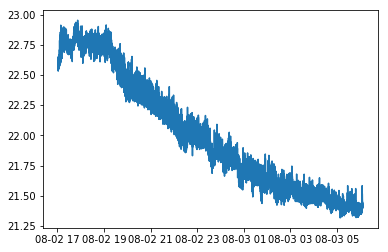

In [5]:
plt.plot(cat1d(dt), cat1d(T))

(<matplotlib.figure.Figure at 0x7f0130505c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f012e3e18d0>)

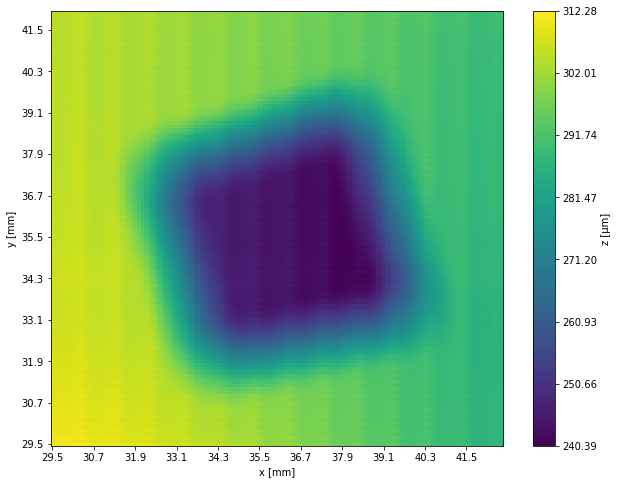

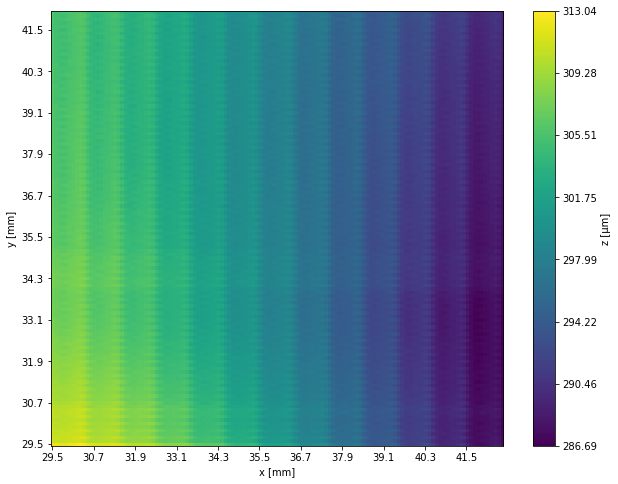

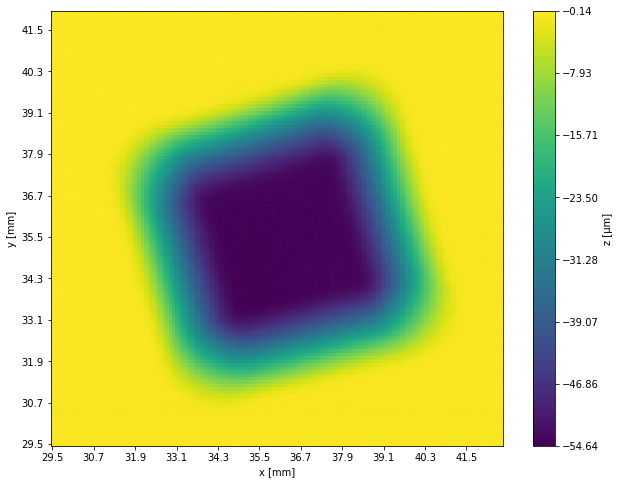

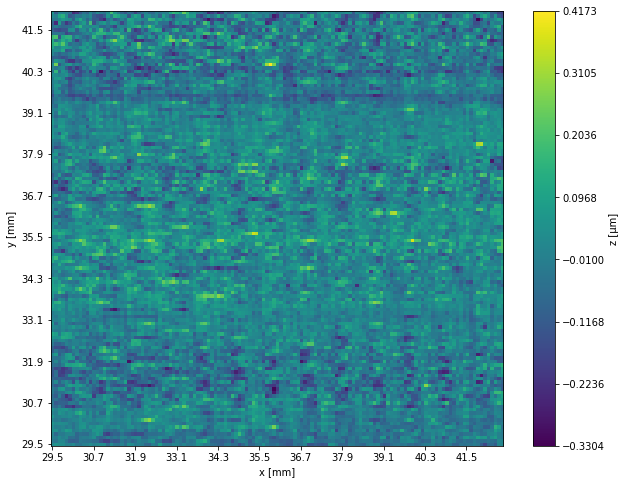

In [6]:
sensor = z[9][0]
background1 = z[10][0]
background2 = z[17][0]
background3 = z[18][0]
signal = sensor - background1 
noise = detrend2D(background2 - background3)

plot(x, y, sensor)
plot(x, y, background1)
plot(x, y, signal)
plot(x, y, noise)

(<matplotlib.figure.Figure at 0x7f012771ddd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f012722b128>)

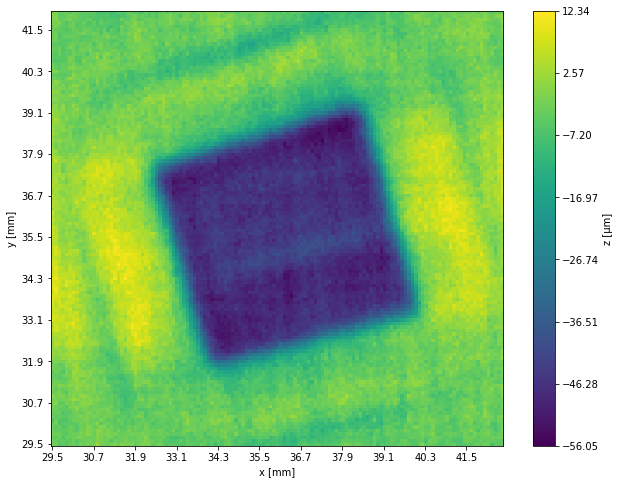

In [47]:
diameter = 2.57
sigma = 0.5
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
kernel_trans = rotate(kernel_trans, ang)
z_reconstructed = wiener(signal, kernel, noise*0.005, 1)
plot(x, y, z_reconstructed)